In [194]:
%load_ext autoreload
%autoreload 2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from rk4 import rk4
from wd_setup import WhiteDwarf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [195]:
M_SOLAR = 1.98e33

1.0000000034765233 1.0000000104295697 1.0
1.0000000034765233 1.0000036454010117 1.0000001298468075
1.0000000034765149 1.0000000034764909 1.000136172823325
1.0000000034590464 1.0000000136287008 1.0001361718628436
1.0000000034692715 1.0000000104210256 1.0001802093990613
1.0000000034635088 1.00000001396452 1.0003006139159425
1.000000003462883 1.0000000080029445 1.000524286291202
1.0000000034468925 1.000000010521292 1.0006960847866524
1.0000000034519485 1.0000000102828972 1.0007164245026263
1.0000000034404743 1.0000000113589331 1.0010002499422528
1.000000003439213 1.0000000091954233 1.0012340674064182
1.0000000034203744 1.0000000101322746 1.0015782476533188
1.0000000034235188 1.0000000100924142 1.001590333780447
1.0000000034065104 1.0000000105344486 1.002033793124068
1.0000000034050518 1.0000000094544799 1.0022627486313174
1.0000000033821865 1.000000009839639 1.0027656270954686
1.000000003384394 1.0000000098380775 1.002773315149483
1.000000003362113 1.0000000100065412 1.0033628934166243
1.

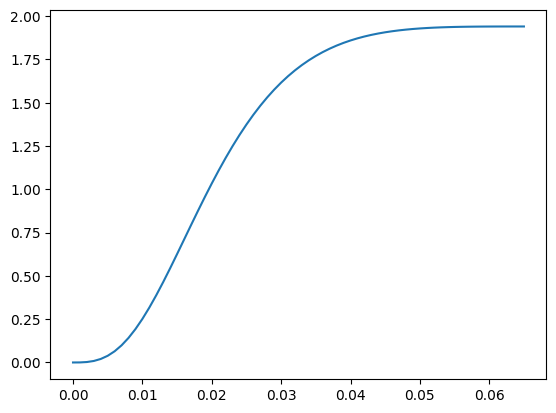

In [253]:
rhoc_scaled = 1e6
Ye = 0.5

wd1 = WhiteDwarf(Ye=Ye, rhoc_scaled=rhoc_scaled)

# Initial conditions
r = 1e-10
state = np.array([rhoc_scaled, 0]) # [density, mass]
dr = 1e-3

R_history = []
M_history = []
rho_history = []

while state[0] > 1e-10:
    R_history.append(r)
    rho_history.append(state[0])
    M_history.append(state[1])
    
    state = rk4(wd1.get_derivative, dr=dr, rb=r, state=state)
    
    r += dr

R_history = np.array(R_history)
M_history = np.array(M_history)
rho_history = np.array(rho_history)

plt.plot(R_history, M_history)

In [239]:
M_history[-1]

0.2798243655012628

In [ ]:
M = []
R = []
dr=1e-3

rhoc_scaled = np.logspace(-1, 7, 100)
for rhoc in tqdm(rhoc_scaled):

    wd1 = WhiteDwarf(Ye=Ye, rhoc_scaled=rhoc_scaled)

    # Initial conditions
    r = 1e-10
    state = np.array([rhoc, (1/3) * rhoc * (r ** 3)]) # [density, mass, pressure]

    while state[0] > 1e-10:
        state = rk4(wd1.get_derivative, dr=dr, rb=r, state=state)
        
        r += dr

    R.append(r)
    if np.isnan(state[1]):
        print(rhoc)
    M.append(state[1])

R = np.array(R)
M = np.array(M)

plt.scatter(R * wd1.R0 / (1000 * 100), M * wd1.M0 / M_SOLAR)
plt.xlabel("R (km)")
plt.ylabel(r"M ($M_\odot$)")

100%|██████████| 70/70 [00:00<00:00, 535.41it/s]


Text(0, 0.5, 'M ($M_\\odot$)')

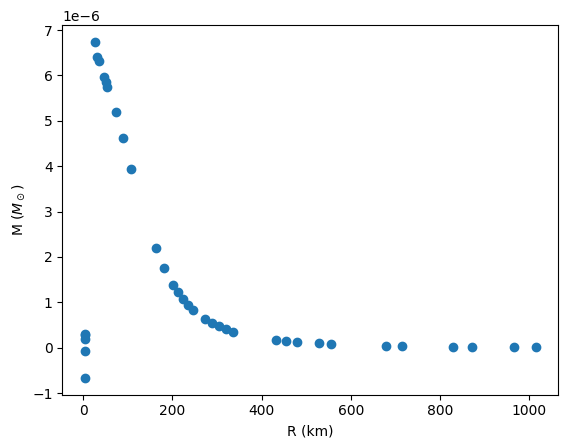

In [198]:
M = []
R = []
dr=1e-3

rhoc_scaled = np.logspace(-5, 4, 70)
for rhoc in tqdm(rhoc_scaled):

    wd1 = WhiteDwarf(Ye=Ye, rhoc_scaled=rhoc_scaled)

    # Initial conditions
    r = 1e-10
    state = np.array([rhoc, (1/3) * rhoc * (r ** 3)]) # [density, mass, pressure]

    while state[0] > 0:
        state = rk4(wd1.get_derivative, dr=dr, rb=r, state=state)
        
        r += dr

    R.append(r)
    M.append(state[1])

R = np.array(R)
M = np.array(M)

plt.scatter(R[1:] * wd1.R0 / (1000 * 100), M[1:] * wd1.M0 / M_SOLAR)
plt.xlabel("R (km)")
plt.ylabel(r"M ($M_\odot$)")